In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.facecolor":"black",
    "figure.edgecolor":"red",
    "axes.facecolor":"black",
    "xtick.color":"yellow",
    "ytick.color":"blue",
    "legend.labelcolor":"linecolor"
})
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
dataset=pd.read_csv("A:/Machine Learning/loan_data_set.csv")

In [2]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

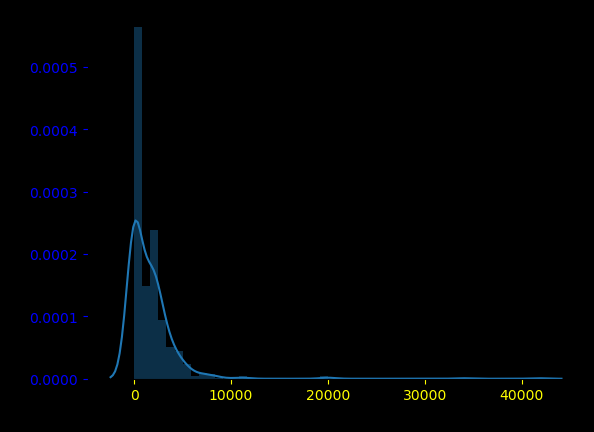

In [3]:
sns.distplot(dataset["CoapplicantIncome"])

In [4]:
q1 = dataset["CoapplicantIncome"].quantile(.25)
q3 = dataset["CoapplicantIncome"].quantile(.75)
iqr = q3-q1

In [5]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)
min_r

-3445.875

In [6]:
max_r

5743.125

In [7]:
dataset = dataset[dataset["CoapplicantIncome"]<=max_r]

In [8]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

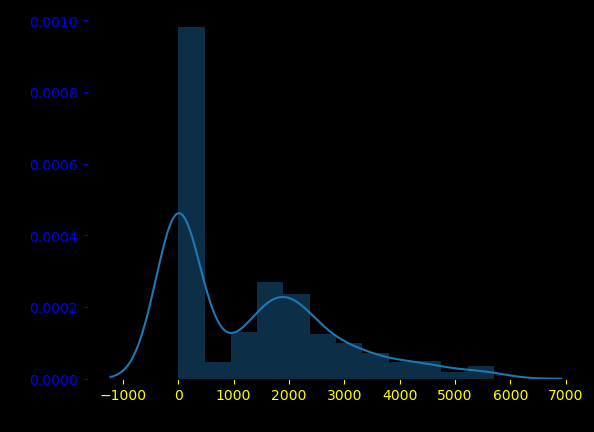

In [9]:
sns.distplot(dataset["CoapplicantIncome"])

In [10]:
from sklearn.preprocessing import FunctionTransformer

In [11]:
ft1=FunctionTransformer(func=np.log1p)
ft1.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome"]= ft1.transform(dataset[["CoapplicantIncome"]])

In [13]:
ft2=FunctionTransformer(func=lambda x:  x**2)
ft2.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome2"]= ft2.transform(dataset[["CoapplicantIncome"]])

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(dataset[["CoapplicantIncome"]])
plt.title("Before while using np.log1p", c='b')
plt.subplot(1,2, 2)
sns.distplot(dataset[["CoapplicantIncome2"]])
plt.title("After while using lambda", c='cyan')